In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the data
data = pd.read_csv("DATA.csv")
data.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [3]:
datalen = len(data)
datalen

36

In [4]:
# Data Cleaning and Preprocessing
data.drop(data.columns[5], axis=1, inplace=True)# Drop irrelevant column
data.head()


,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [5]:
data['Car'] = data['Car'] + ' ' + data['Model']   # Combine 'Car' and 'Model'
data

,Car,Model,Volume,Weight,CO2
0,Toyota Aygo,Aygo,1000,790,99
1,Mitsubishi Space Star,Space Star,1200,1160,95
2,Skoda Citigo,Citigo,1000,929,95
3,Fiat 500,500,900,865,90
4,Mini Cooper,Cooper,1500,1140,105
5,VW Up!,Up!,1000,929,105
6,Skoda Fabia,Fabia,1400,1109,90
7,Mercedes A-Class,A-Class,1500,1365,92
8,Ford Fiesta,Fiesta,1500,1112,98
9,Audi A1,A1,1600,1150,99


In [6]:
data.drop(data.columns[1], axis=1, inplace=True)  # Drop the 'Model' column
data.head()

,Car,Volume,Weight,CO2
0,Toyota Aygo,1000,790,99
1,Mitsubishi Space Star,1200,1160,95
2,Skoda Citigo,1000,929,95
3,Fiat 500,900,865,90
4,Mini Cooper,1500,1140,105


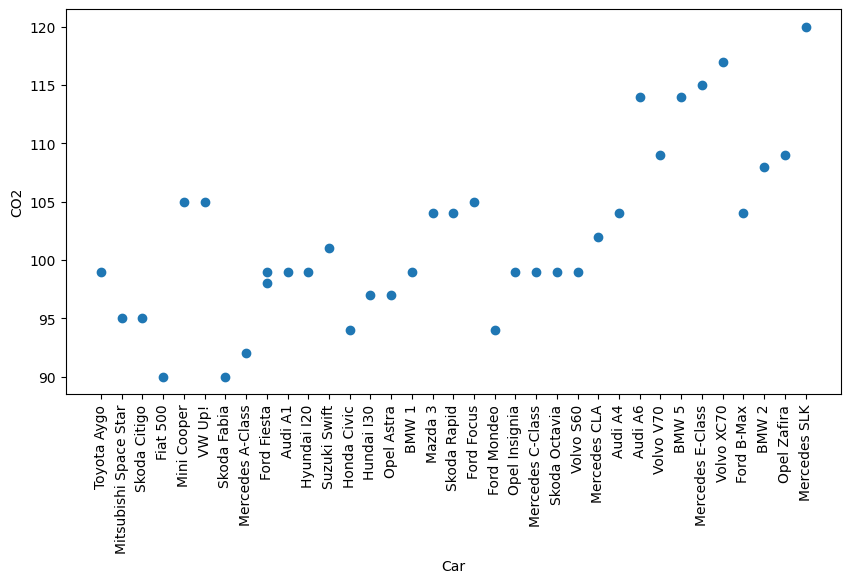

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data['Car'],data['CO2'],'o')
plt.xlabel('Car')
plt.ylabel('CO2')
plt.xticks(rotation=90)
plt.show()

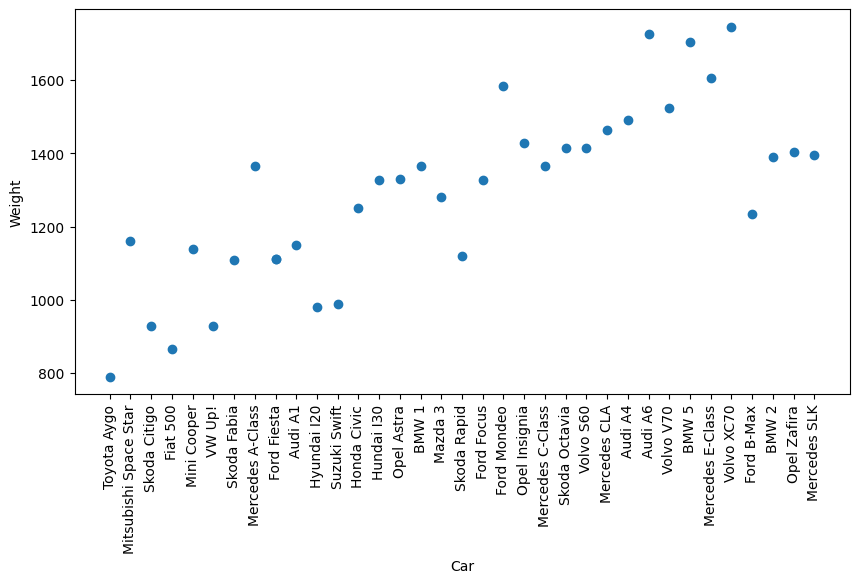

In [8]:
plt.figure(figsize=(10,5))
plt.plot(data['Car'],data['Weight'], 'o')

plt.xlabel('Car')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

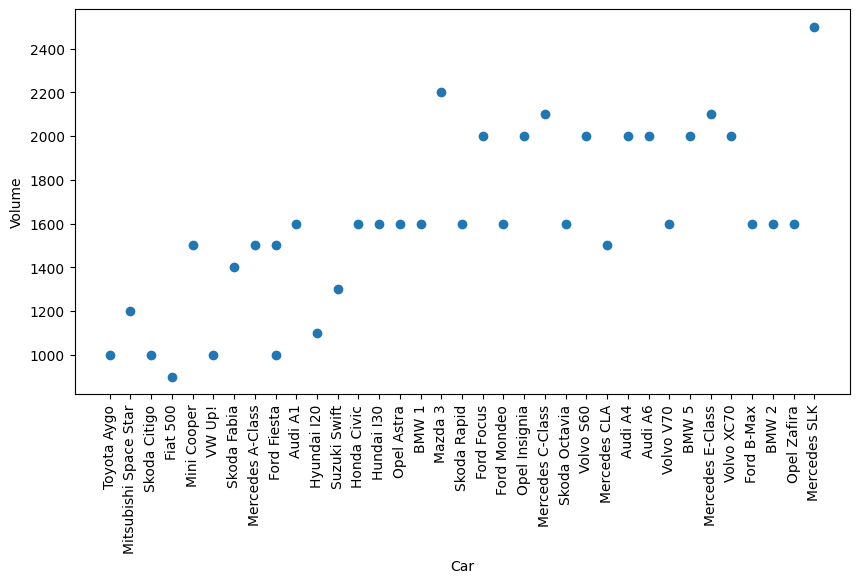

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data['Car'],data['Volume'], 'o')

plt.xlabel('Car')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.show()


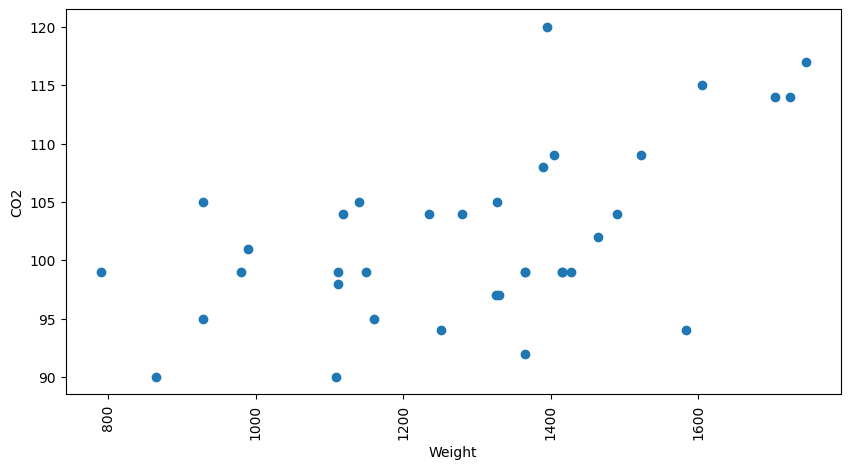

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data['Weight'],data['CO2'], 'o')

plt.xlabel('Weight')
plt.ylabel('CO2')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Feature Engineering
data['Volume*Weight'] = data['Volume'] * data['Weight']

In [12]:
# Defining Features and Target Variable
X = data[['Volume', 'Weight', 'Volume*Weight']]
y = data['CO2']

In [13]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
# Linear Regression
linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_pred_linear = linear_regr.predict(X_test)
coefficients = linear_regr.coef_

In [15]:
#Random Forest regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

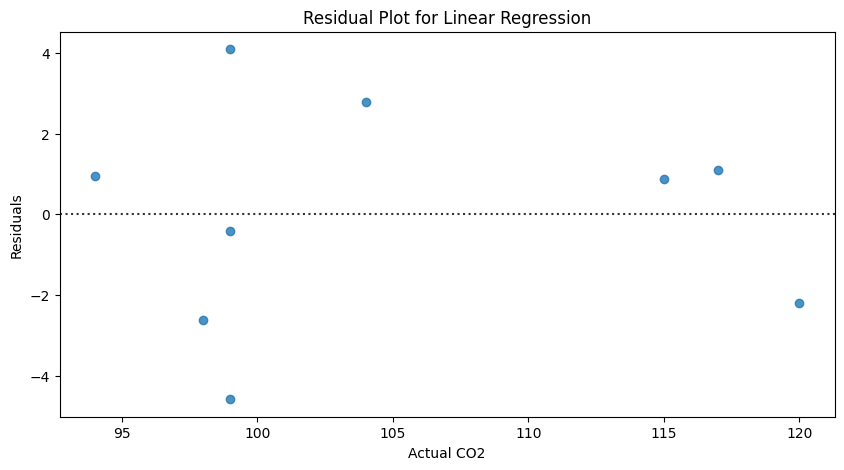

In [16]:
# Visualizing Results
# Residual plot for Linear Regression
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred_linear)
plt.xlabel('Actual CO2')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

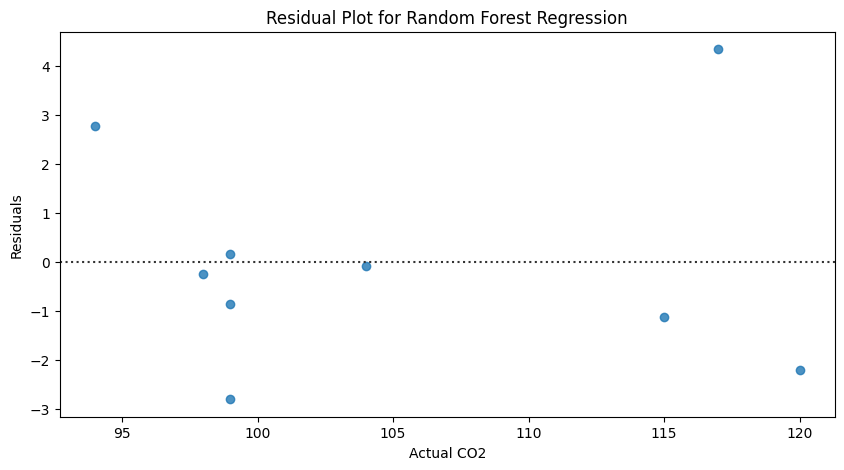

In [17]:
# Visualizing Results
# Residual plot for Random Forest Regression
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual CO2')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression')
plt.show()

In [18]:
# Feature importance for Linear Regression
feature_importance_linear  = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance_linear = feature_importance_linear.sort_values(by='Importance', ascending=False)

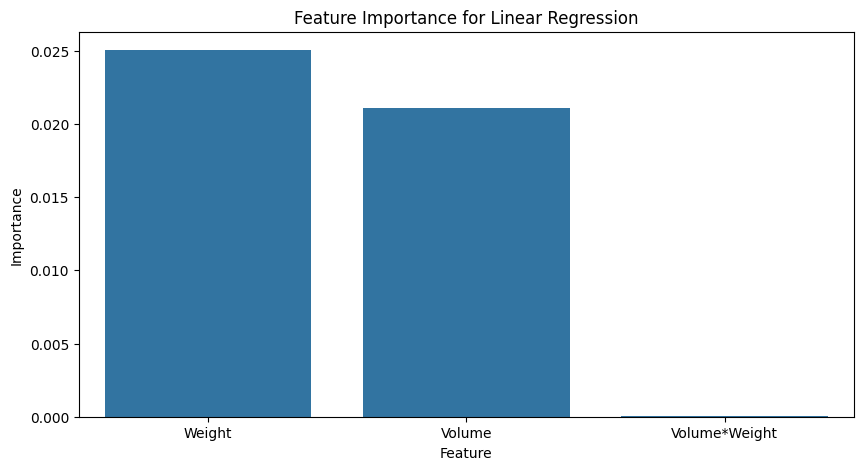

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Importance', data=feature_importance_linear)
plt.title('Feature Importance for Linear Regression')
plt.show()


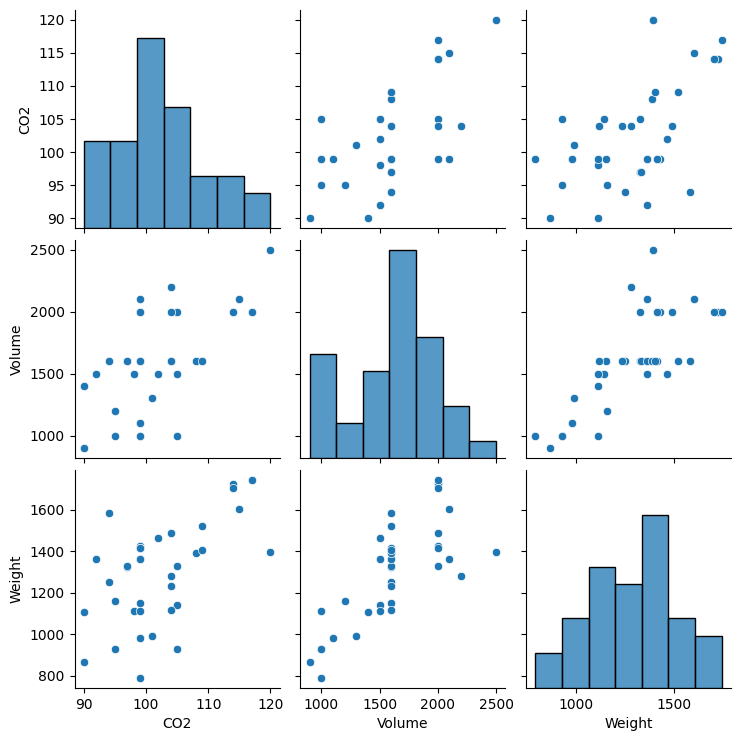

In [20]:
# Pairplot to visualize relationships between all variables
sns.pairplot(data[['CO2', 'Volume', 'Weight']])
plt.show()


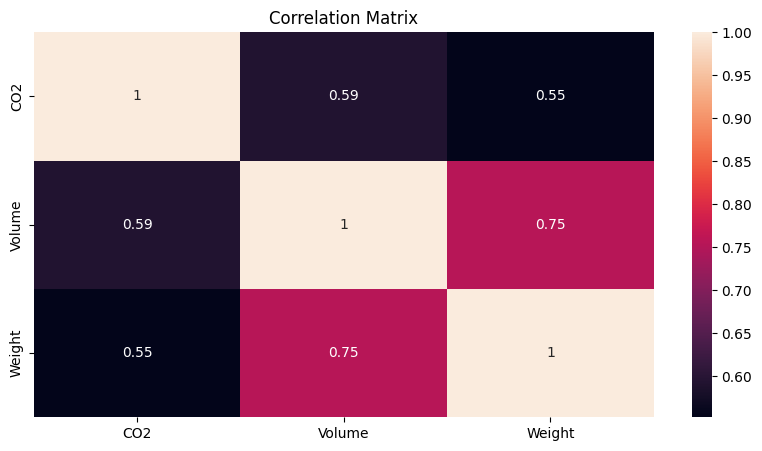

In [21]:
# Heatmap to visualize correlation between variables
plt.figure(figsize=(10, 5))
sns.heatmap(data[['CO2', 'Volume', 'Weight']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Model Evaluation for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
accuracy_linear= r2_linear*100
print(f'Linear Regression - Mean Absolute Error (MAE): {mae_linear}')
print(f'Linear Regression - Root Mean Squared Error (RMSE): {rmse_linear}')
print(f'Linear Regression - R-squared (R²): {r2_linear}')
print(f'LInear Regression- Accuracy:{accuracy_linear:.2f}%')

Linear Regression - Mean Absolute Error (MAE): 4.5263714115818
Linear Regression - Root Mean Squared Error (RMSE): 5.397202118819648
Linear Regression - R-squared (R²): 0.6495078657720298
LInear Regression- Accuracy:64.95%


In [23]:
# Model Evaluation for Random Forest Regression
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
accuracy_rf=r2_rf*100
print(f'Random Forest - Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'Random Forest - R-squared (R²): {r2_rf}')
print(f' Random Forest - Accuracy:{accuracy_rf:.2f}%')

Random Forest - Mean Absolute Error (MAE): 4.622777777777778
Random Forest - Root Mean Squared Error (RMSE): 6.119090573315976
Random Forest - R-squared (R²): 0.549479378342246
 Random Forest - Accuracy:54.95%


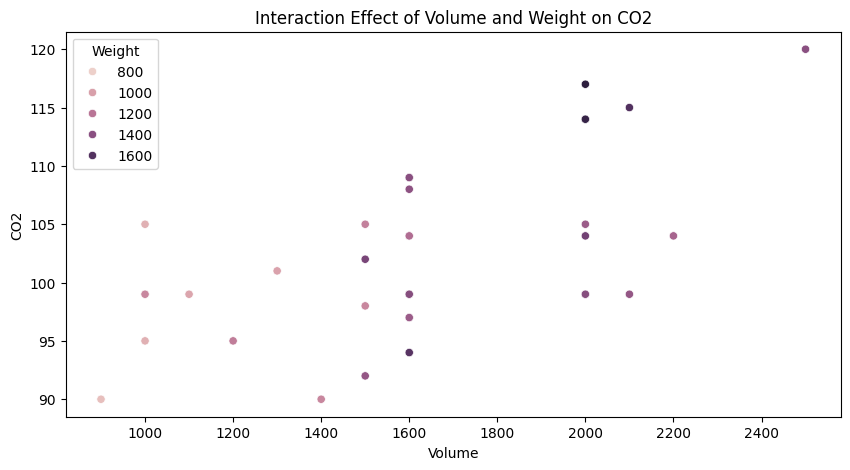

In [24]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Volume', y='CO2', hue='Weight', data=data)
plt.title('Interaction Effect of Volume and Weight on CO2')
plt.show()